In [1]:
import torch
import torch.optim as optim
from src.env.pig_game import PigGame
from src.env.dummy_player import DummyPlayer 
from src.model.actor_critic import Actor, Critic
from src.loop.training_loop import training_loop

In [2]:
torch.manual_seed(0)

In [3]:
env = PigGame()

actor = Actor()  
critic = Critic()

dummy = DummyPlayer()

In [4]:
actor_optimizer = optim.Adam(actor.parameters(), lr=1e-3)
critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

num_episodes = 1e3
gamma = 0.05
entropy_beta = 1e-2

In [5]:
rewards, game_scores, actor_loss, critic_loss = training_loop(
    env=env, 
    actor=actor, 
    critic=critic, 
    dummy=dummy, 
    actor_optimizer=actor_optimizer, 
    critic_optimizer=critic_optimizer, 
    gamma=gamma, 
    num_episodes=int(num_episodes), 
    debug=False,
    entropy_beta=entropy_beta
)

Episode 0 finished, Total Reward: -73.0
Episode 100 finished, Total Reward: -89.0
Episode 200 finished, Total Reward: -43.0
Episode 300 finished, Total Reward: 8.0
Episode 400 finished, Total Reward: 6.0
Episode 500 finished, Total Reward: -15.0
Episode 600 finished, Total Reward: -13.0
Episode 700 finished, Total Reward: -13.0
Episode 800 finished, Total Reward: -6.0
Episode 900 finished, Total Reward: 3.0


In [6]:
import numpy as np

def moving_average(values, window):
    return np.convolve(values, np.ones(window) / window, mode='valid')

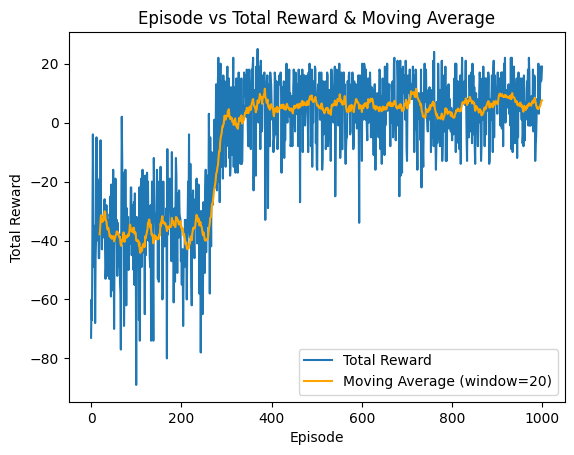

In [7]:
import matplotlib.pyplot as plt

window_size = 20
moving_avg_rewards = moving_average(rewards, window_size)

plt.plot(range(len(rewards)), rewards, label='Total Reward')
plt.plot(range(window_size - 1, len(rewards)), moving_avg_rewards, label=f'Moving Average (window={window_size})', color='orange')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
# plt.ylim([-100,50])
# plt.xlim([0,200])
plt.title('Episode vs Total Reward & Moving Average')
plt.legend()

plt.show()


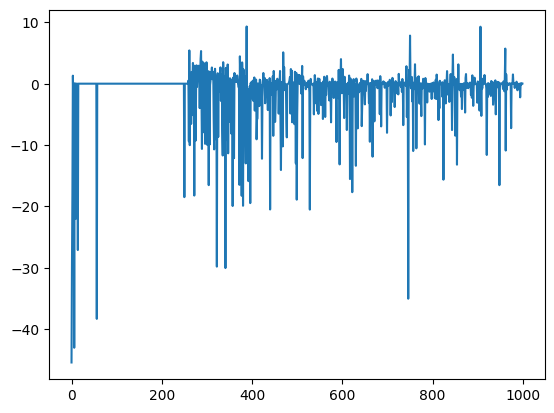

In [8]:
plt.plot(actor_loss)

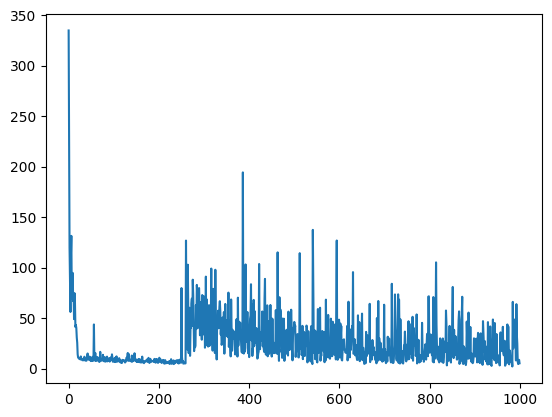

In [9]:
plt.plot(critic_loss)

Dummy won 337 times.
NN (AI) won 430 times.
AI won 56.06% of the time.


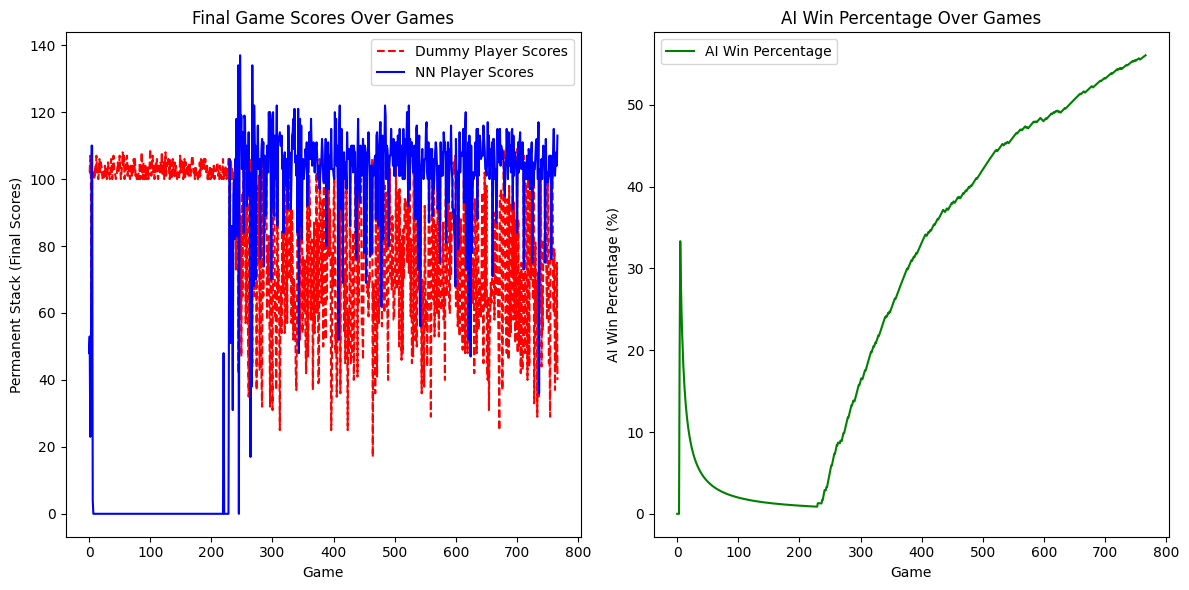

In [10]:
def extract_games_and_final_scores(game_scores):
    all_games = []
    final_scores = []
    current_game = []
    
    for round_scores in game_scores:
        current_game.append(round_scores)
        
        if round_scores[0][0] >= 100 or round_scores[0][1] >= 100:
            all_games.append(current_game)
            
            final_scores.append((round_scores[0][0], round_scores[0][1]))
            
            current_game = []
    
    return all_games, final_scores

all_games, final_scores = extract_games_and_final_scores(game_scores)

def plot_game_scores_and_wins(final_scores, num_episodes):
    dummy_scores = [score[1] for score in final_scores]  
    nn_scores = [score[0] for score in final_scores]     

    dummy_wins = 0
    nn_wins = 0
    nn_win_percentage = []

    for i in range(len(final_scores)):
        if nn_scores[i] >= 100:  
            nn_wins += 1
        elif dummy_scores[i] >= 100:
            dummy_wins += 1
        
        nn_win_percentage.append((nn_wins / (i + 1)) * 100)

    print(f"Dummy won {dummy_wins} times.")
    print(f"NN (AI) won {nn_wins} times.")
    print(f"AI won {nn_wins / len(final_scores) * 100:.2f}% of the time.")

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(len(final_scores)), dummy_scores, label="Dummy Player Scores", color='red', linestyle='--')
    plt.plot(range(len(final_scores)), nn_scores, label="NN Player Scores", color='blue')
    plt.xlabel('Game')
    plt.ylabel('Permanent Stack (Final Scores)')
    plt.title('Final Game Scores Over Games')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(final_scores)), nn_win_percentage, label='AI Win Percentage', color='green')
    plt.xlabel('Game')
    plt.ylabel('AI Win Percentage (%)')
    plt.title('AI Win Percentage Over Games')
    plt.legend()

    plt.tight_layout()
    plt.show()

def filter_consecutive_duplicates(final_scores):

    if not final_scores:
        return []
    
    filtered_scores = [final_scores[0]] 

    for i in range(1, len(final_scores)):

        if final_scores[i] != final_scores[i - 1]:
            filtered_scores.append(final_scores[i])

    return filtered_scores

final_scores = filter_consecutive_duplicates(final_scores)
plot_game_scores_and_wins(final_scores, len(final_scores))


In [11]:
import matplotlib.pyplot as plt

def plot_specific_game(all_games, game_index):

    if game_index >= len(all_games):
        print(f"Invalid game index. There are only {len(all_games)} games.")
        return
    
    current_game = all_games[game_index]

    dummy_scores = [round_scores[0][1] for round_scores in current_game]
    nn_scores = [round_scores[0][0] for round_scores in current_game] 

    plt.figure(figsize=(10, 6))
    plt.plot(dummy_scores, label='Dummy Player Scores', color='red', linestyle='--')
    plt.plot(nn_scores, label='NN Player Scores', color='blue')
    plt.xlabel('Round')
    plt.ylabel('Scores')
    plt.title(f'Game {game_index + 1}: Score Progression')
    plt.legend()

    plt.show()


In [12]:
def filter_full_games(all_games):
    filtered_games = [game for game in all_games if len(game) > 1]
    return filtered_games

all_games = filter_full_games(all_games)

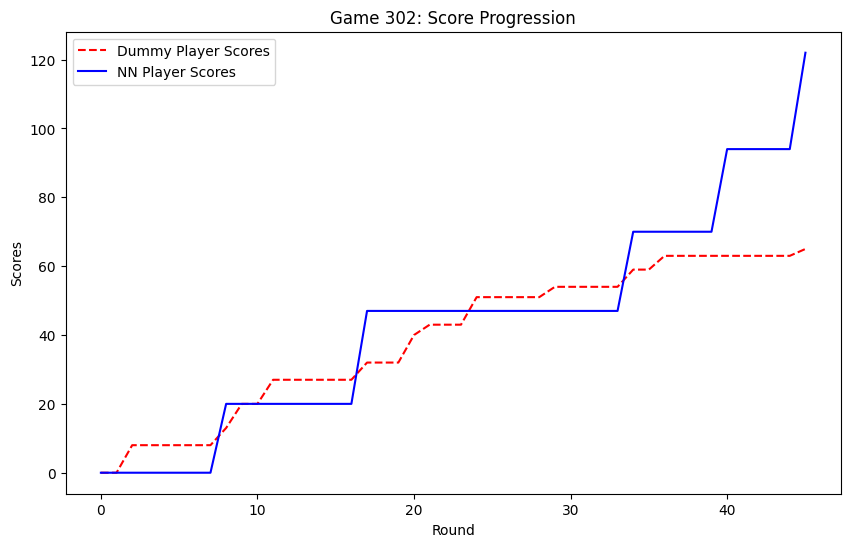

In [13]:
plot_specific_game(all_games, 301)

In [14]:
import matplotlib.pyplot as plt

def plot_multiple_games(all_games, start_game_index, end_game_index):

    if start_game_index < 0 or end_game_index >= len(all_games):
        print(f"Invalid game range. There are only {len(all_games)} games.")
        return
        
    plt.figure(figsize=(12, 8))
    
    for game_index in range(start_game_index, end_game_index + 1):
        current_game = all_games[game_index]
        
        dummy_scores = [round_scores[0][1] for round_scores in current_game]
        nn_scores = [round_scores[0][0] for round_scores in current_game]
        
        plt.plot(dummy_scores, linestyle='--', color='red', alpha=0.7)
        plt.plot(nn_scores, linestyle='-', color='blue', alpha=0.7)

    plt.xlabel('Round')
    plt.ylabel('Scores')
    plt.title(f'Games {start_game_index + 1} to {end_game_index + 1}: Score Progression')
    plt.legend()
    
    plt.show()


/tmp/ipykernel_331236/547675715.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


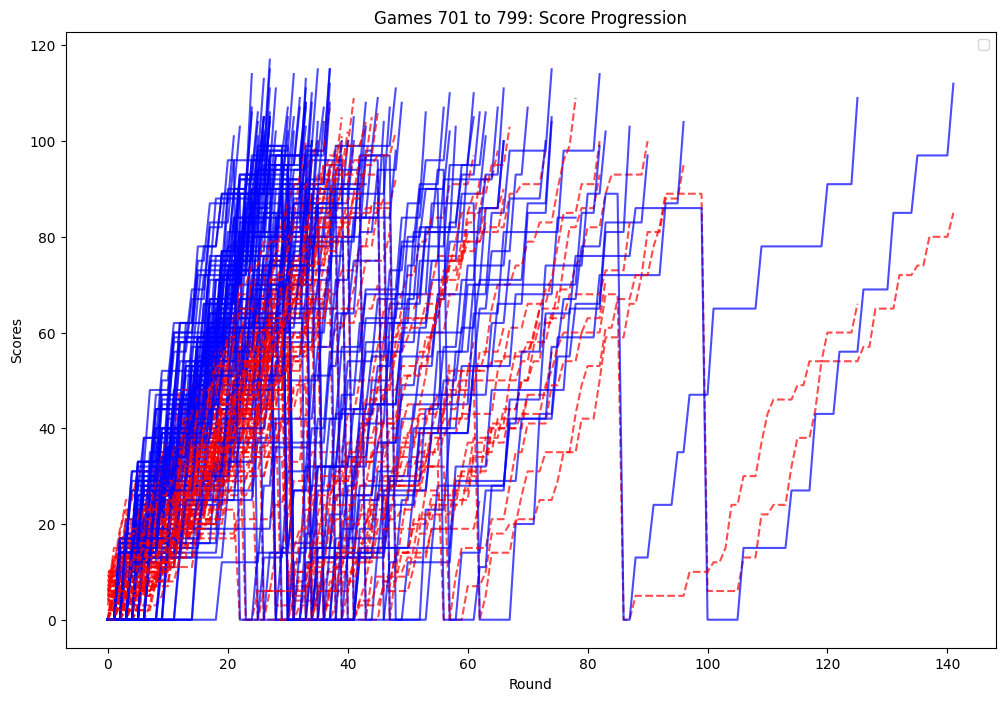

In [15]:
plot_multiple_games(all_games, start_game_index=700, end_game_index=798)